# References

- Vectice Documentation: https://docs.vectice.com/
- Vectice API Documentation: https://api-docs.vectice.com/

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Install the latest Vectice Python client library

In [ ]:
%pip install --q vectice -U

## Get started by connecting to Vectice

In [7]:
import vectice as vect

vec = vect.connect(config="tut.json")

VECTICE_API_ENDPOINT is deprecated and will be removed in 23.3.1.0, please use VECTICE_HOST instead.
Welcome, Aidan. You`re now successfully connected to Vectice.

To access your personal workspace, use connection.my_workspace
To access a specific workspace, use connection.workspace(Workspace ID)
To get a list of workspaces you can access and their IDs, use connection.list_workspaces()

If you are using a notebook you can call the help by using a Vectice returned object with the builtin notebook "?":
>> connection?

If you are using an IDE you can call the help() method on any object returned by Vectice:
>> help(connection)

For quick access to the list of workspaces in the Vectice web app, visit:
https://dev.vectice.com/workspaces


## Specify which project phase you want to document
In Vectice UI, navigate to your personal workspace inside your default Tutorial project go to the modeling phase and copy paste your Phase Id below.

In [8]:
phase = vec.phase("PHA-1170")

Phase 'Data Preparation' successfully retrieved."

For quick access to the Phase in the Vectice web app, visit:
https://dev.vectice.com/browse/phase/PHA-1170


## Next we are going to create an iteration
An iteration allows you to organize your work in repeatable sequences of steps. You can have multiple iteration within a phase

In [9]:
prep_iteration = phase.create_iteration()

New Iteration number '4' created.

For quick access to the Iteration in the Vectice web app, visit:
https://dev.vectice.com/browse/iteration/ITR-337


In [10]:
df_initial = pd.read_csv("https://raw.githubusercontent.com/vectice/GettingStarted/aidann/tutorial_update/23.2/tutorial/SampleSuperstore.csv")

## Push a dataset with an image as attachements
Use the following code block to create a local dataset and generate an image:

In [11]:
origin_ds = vect.FileResource(paths="SampleSuperstore.csv", dataframes=df_initial)


origin_dataset = vect.Dataset.origin(
    name="ProductSales Origin",
    resource=origin_ds, 
)

File: SampleSuperstore.csv wrapped successfully.


In [12]:
prep_iteration.step_select_data = origin_dataset

New Version: 'Version 1' of Dataset: 'ProductSales Origin' added to Step: Select Data
Attachments: None
Link to Step: https://dev.vectice.com/browse/iteration/ITR-337



In [14]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    #Reducing Cardinality
    top_ten_cities=df["City"].value_counts().head(10).index
    df["City"]=df["City"].apply(lambda c: c if c in top_ten_cities else "others")
    top_ten_states=df["State"].value_counts().head(10).index
    df["State"]=df["State"].apply(lambda c: c if c in top_ten_states else "others")
    
    ## Dealing with Outliers
    q1,q2 =df["Profit"].quantile([0.1,0.9])
    df=df[df["Profit"].between(q1,q2)]
    
    
    return df

In [15]:
df = wrangle("https://raw.githubusercontent.com/vectice/GettingStarted/aidann/tutorial_update/23.2/tutorial/SampleSuperstore.csv")
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,7994.000000,7994.000000,7994.000000,7994.000000,7994.000000
mean,55874.241931,98.123799,3.558419,0.131893,15.795750
std,32393.876810,178.131556,2.083735,0.182274,20.670667
min,1040.000000,0.444000,1.000000,0.000000,-15.466600
25%,23434.000000,14.016000,2.000000,0.000000,2.957400
50%,60035.000000,36.328000,3.000000,0.000000,8.666500
75%,90032.000000,105.520000,5.000000,0.200000,22.200000
max,99301.000000,4164.050000,14.000000,0.800000,89.222400


C:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


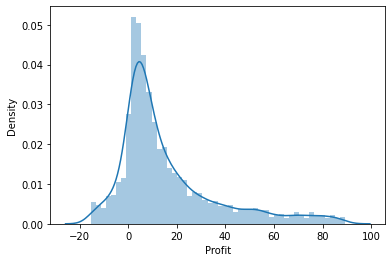

In [20]:
#Checking for outliers
sns.distplot(df["Profit"]);
plt.savefig("Profit.png")

C:\Users\Aidan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


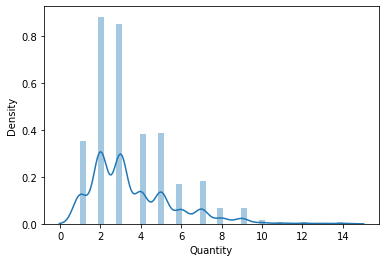

In [21]:
#Checking for outliers
sns.distplot(df["Quantity"])
plt.savefig("Quantity.png")

In [22]:
df.to_csv("ProductSales Cleaned.csv")

In [23]:
prepared_ds = vect.FileResource(paths="ProductSales Cleaned.csv", dataframes=df)


prepared_ds = vect.Dataset.clean(
    name="ProductSales Cleaned",
    resource=prepared_ds,
    derived_from=origin_dataset,
    attachments=["Profit.png", "Quantity.png"]
)

File: ProductSales Cleaned.csv wrapped successfully.


In [24]:
prep_iteration.step_clean_data = prepared_ds 

New Dataset: 'ProductSales Cleaned' Version: 'Version 1' added to Step: Clean data
Attachments: Quantity.png, Profit.png
Link to Step: https://dev.vectice.com/browse/iteration/ITR-337

